# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import tweepy 
import json 

In [2]:
# Read csv file
df_tweets_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df_tweets_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [59]:
response = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv", allow_redirects=True)
open('image_predictions.tsv', 'wb').write(response.content)
df_img = pd.read_csv('image_predictions.tsv', sep = '\t')

In [60]:
df_img 

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tweets_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.errors.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
# Read downloaded json file into a tweet_json DataFrame
rows = []

with open('tweet_json.txt', encoding="utf-8") as file:
    row = file.readlines()
    for line in row:
        parsed_tweets = json.loads(line)
        tweets_id = parsed_tweets['id']
        retweets_count = parsed_tweets['retweet_count']
        favrite_count = parsed_tweets['favorite_count']
        rows.append({'tweet_id':tweets_id,
                       'retweet_count': retweets_count,
                       'favorite_count': favrite_count})
        
df_tweet_json = pd.DataFrame(rows, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [7]:
df_tweet_json 

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Visual Assessement

In [8]:
df_tweets_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [9]:
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [10]:
df_tweet_json

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


## Data Programmatic Assessment
#### We can use Pandas functions with Pandas methods to carry out our data assessment.

In [11]:
# assessing overall df_tweets_archive dataframe
df_tweets_archive.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# Assessing df_tweets_archive expanded_urls column for data issues
df_tweets_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [13]:
# Assessing df_tweets_archive source column for data issues
df_tweets_archive["source"].value_counts()  

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [14]:
# assessing overall df_img dataframe
df_img.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# assessing overall df_img dataframe
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
# Assessing df_img jpg_url column for duplicated data
sum(df_img['jpg_url'].duplicated()) 

66

In [17]:
# assessing overall df_tweet_json dataframe
df_tweet_json.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues
1. Remove duplicate url's in expanded_urls column that appear twice in a row by spliting the expanded_urls column using str.split() function

2. Clean the data in df_tweets_archive_clean source column by splitting the column into two columns to accomodate the source_name and the source_url

3. Remove unnecessary data from df_tweets_archive_clean name column such as "an", "None", "the" and "a"

4. Drop unneccessary columns from the dataframe

5. Remove trailing +0000 from df_tweets_archive_clean timestamp column and use pd.to_datetime to convert timestamp from string to datetime

6. Remove url's not related to twitter from the df_tweets_archive_clean expanded_urls column.

7. Drop unneccessary nan values from df_tweets_archive_clean expanded_urls column 

8. Removing url's not belonging to 'We rate dogs' from the df_tweets_archive_clean expanded_urls column

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [19]:
# Make copies of original pieces of data
df_tweets_archive_clean = df_tweets_archive.copy()
df_img_clean = df_img.copy()
df_tweet_json_clean = df_tweet_json.copy()   

### Issue #1:

In [20]:
df_tweets_archive_clean.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

#### Define
Remove duplicate url's in expanded_urls column that appear twice in a row by spliting the expanded_urls column using str.split() function

#### Code

In [21]:
# Removing duplicates in expanded_urls column 
df_tweets_archive_clean["expanded_single_urls"] = df_tweets_archive_clean["expanded_urls"].str.split(",").str[0] 
df_tweets_archive_clean.drop("expanded_urls", axis=1, inplace=True)
df_tweets_archive_clean.rename(columns={"expanded_single_urls":"expanded_urls"}, inplace=True)

#### Test

In [22]:
# Testing if the duplicated url's have been removed in expanded_urls column 
df_tweets_archive_clean['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/700143752053182464/photo/1    2
https://twitter.com/dog_rates/status/667138269671505920/photo/1    2
https://twitter.com/dog_rates/status/837820167694528512/photo/1    2
https://twitter.com/dog_rates/status/712809025985978368/photo/1    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1    2
                                                                  ..
https://twitter.com/dog_rates/status/753398408988139520/video/1    1
https://twitter.com/dog_rates/status/753420520834629632/video/1    1
https://twitter.com/dog_rates/status/753655901052166144/photo/1    1
https://twitter.com/dog_rates/status/754011816964026368/photo/1    1
https://twitter.com/dog_rates/status/666020888022790149/photo/1    1
Name: expanded_urls, Length: 2140, dtype: int64

### Issue #2:

In [23]:
df_tweets_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

## Define 2
Clean the data in df_tweets_archive_clean source column by splitting the column into two columns to accomodate the source_name and the source_url

Code

In [24]:
# Split source column into source_name and source_url and drop the source column
df_tweets_archive_clean["source_name"] = df_tweets_archive_clean["source"].str.extract(">(.*)<")
df_tweets_archive_clean["source_url"] = df_tweets_archive_clean["source"].str.extract('href="(.*?)"')
df_tweets_archive_clean.drop(columns="source", inplace=True)

### Test

In [25]:
# Test to see the output of splitting the source column into two
df_tweets_archive_clean[['source_name', 'source_url']].value_counts()

source_name          source_url                                  
Twitter for iPhone   http://twitter.com/download/iphone              2221
Vine - Make a Scene  http://vine.co                                    91
Twitter Web Client   http://twitter.com                                33
TweetDeck            https://about.twitter.com/products/tweetdeck      11
dtype: int64

### Issue 3

In [26]:
df_tweets_archive_clean[df_tweets_archive_clean["name"].isin(["an", "None", "the", "a"])]["name"]

5       None
7       None
12      None
24      None
25      None
        ... 
2351    None
2352       a
2353       a
2354       a
2355    None
Name: name, Length: 815, dtype: object

### Define 
Remove unnecessary data from df_tweets_archive_clean name column such as "an", "None", "the" and "a"

### Code

In [27]:
# remove "an", "None", "the" and "a" 
df_tweets_archive_clean.loc[df_tweets_archive_clean["name"].isin(["an", "None", "the", "a"]), "name"] = np.nan

### Test

In [28]:
# Test to see the output of our changes 
df_tweets_archive_clean[df_tweets_archive_clean["name"].isin(["an", "None", "the", "a"])]["name"]

Series([], Name: name, dtype: object)

### Issue 4

In [29]:
df_tweets_archive_clean.columns.tolist()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'expanded_urls',
 'source_name',
 'source_url']

### Define 
Drop unneccessary columns from the df_tweets_archive_clean dataframe

### Code

In [30]:
# Drop unneccessary columns from the dataframe
df_tweets_archive_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id'
                       , 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)
df_tweets_archive_clean.reset_index(drop=True, inplace=True) 

### Test

In [31]:
# check the columns of our dataframe
df_tweets_archive_clean.columns.tolist()

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'expanded_urls',
 'source_name',
 'source_url']

### Issue 5:

In [32]:
df_tweets_archive_clean[['timestamp']]

,timestamp
0,2017-08-01 16:23:56 +0000
1,2017-08-01 00:17:27 +0000
2,2017-07-31 00:18:03 +0000
3,2017-07-30 15:58:51 +0000
4,2017-07-29 16:00:24 +0000
...,...
2351,2015-11-16 00:24:50 +0000
2352,2015-11-16 00:04:52 +0000
2353,2015-11-15 23:21:54 +0000
2354,2015-11-15 23:05:30 +0000


## Define 5
Remove trailing +0000 from df_tweets_archive_clean timestamp column and use pd.to_datetime to convert timestamp from string to datetime

## code

In [33]:
# Remove trailing +0000 from timestamp
df_tweets_archive_clean['timestamp'] = df_tweets_archive_clean['timestamp'].str[0:18]

# Convert the timestamp column to datetime
df_tweets_archive_clean['timestamp'] = pd.to_datetime(df_tweets_archive_clean['timestamp'])

#### references
#### https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

### Test

In [34]:
# Test to see the timestamp column data
df_tweets_archive_clean[['timestamp']]

,timestamp
0,2017-08-01 16:23:05
1,2017-08-01 00:17:02
2,2017-07-31 00:18:00
3,2017-07-30 15:58:05
4,2017-07-29 16:00:02
...,...
2351,2015-11-16 00:24:05
2352,2015-11-16 00:04:05
2353,2015-11-15 23:21:05
2354,2015-11-15 23:05:03


### Issue 6


In [35]:
for invalid_url in df_tweets_archive_clean.expanded_urls:
    print(invalid_url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://gofundme.com/ydvmve-surgery-for-jax
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/vide

https://twitter.com/dog_rates/status/711363825979756544/photo/1
https://twitter.com/dog_rates/status/711306686208872448/photo/1
https://twitter.com/dog_rates/status/711008018775851008/photo/1
https://twitter.com/dog_rates/status/710997087345876993/photo/1
https://twitter.com/dog_rates/status/710844581445812225/photo/1
https://twitter.com/dog_rates/status/710833117892898816/photo/1
https://twitter.com/dog_rates/status/710658690886586372/photo/1
https://vine.co/v/idaTpwH5TgU
https://twitter.com/dog_rates/status/710588934686908417/photo/1
https://vine.co/v/iw9hUFAMerV
https://twitter.com/dog_rates/status/710283270106132480/photo/1
https://twitter.com/dog_rates/status/710272297844797440/photo/1
https://twitter.com/dog_rates/status/710269109699739648/photo/1
https://twitter.com/dog_rates/status/710153181850935296/photo/1
https://twitter.com/dog_rates/status/710140971284037632/photo/1
https://twitter.com/dog_rates/status/710117014656950272/photo/1
https://twitter.com/dog_rates/status/7099187

https://twitter.com/dog_rates/status/680055455951884288/photo/1
https://twitter.com/dog_rates/status/679877062409191424/photo/1
https://vine.co/v/iAAxTbj1UAM
https://twitter.com/dog_rates/status/679862121895714818/photo/1
https://twitter.com/dog_rates/status/679854723806179328/photo/1
https://twitter.com/dog_rates/status/679844490799091713/photo/1
https://twitter.com/dog_rates/status/679828447187857408/photo/1
https://twitter.com/dog_rates/status/679777920601223168/photo/1
https://twitter.com/dog_rates/status/679736210798047232/photo/1
https://twitter.com/dog_rates/status/679729593985699840/photo/1
https://twitter.com/dog_rates/status/679722016581222400/photo/1
https://twitter.com/dog_rates/status/679530280114372609/photo/1
https://twitter.com/dog_rates/status/679527802031484928/photo/1
https://twitter.com/dog_rates/status/679511351870550016/photo/1
https://twitter.com/dog_rates/status/679503373272485890/photo/1
https://twitter.com/dog_rates/status/679475951516934144/photo/1
https://tw

### Define
Remove url's not related to twitter from the df_tweets_archive_clean expanded_urls column.

### Code

In [36]:
### geeting rid of url's not related to twitter 
invalied_url = ["vine.co","gofundme","m.youtube.com", "us.blastingnews.com","weratedogs.com","petfinder","facebook.com","http://goo.gl","loveyourmelon.com", "patreon"]
for url in invalied_url:
    df_tweets_archive_clean = df_tweets_archive_clean[~df_tweets_archive_clean.expanded_urls.str.contains(url, na=False)]

### Test

In [37]:
# Testing to see if url not related to twitter are removed
for invalid_url in df_tweets_archive_clean.expanded_urls:
    print(invalid_url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/video/1
https://twitter.com/dog_rates/status/888

https://twitter.com/dog_rates/status/679158373988876288/photo/1
https://twitter.com/dog_rates/status/754856583969079297/photo/1
https://twitter.com/dog_rates/status/754747087846248448/photo/1
https://twitter.com/dog_rates/status/754482103782404096/video/1
https://twitter.com/dog_rates/status/754449512966619136/photo/1
https://twitter.com/dog_rates/status/754120377874386944/photo/1
https://twitter.com/dog_rates/status/754011816964026368/photo/1
https://twitter.com/dog_rates/status/753655901052166144/photo/1
https://twitter.com/dog_rates/status/753420520834629632/video/1
https://twitter.com/dog_rates/status/753398408988139520/video/1
https://twitter.com/dog_rates/status/753375668877008896/photo/1
https://twitter.com/dog_rates/status/681523177663676416/photo/1
https://twitter.com/dog_rates/status/753294487569522689/photo/1
https://twitter.com/dog_rates/status/753026973505581056/photo/1
https://twitter.com/dog_rates/status/752917284578922496/photo/1
https://twitter.com/dog_rates/status/752

https://twitter.com/dog_rates/status/672466075045466113/photo/1
https://twitter.com/dog_rates/status/672272411274932228/photo/1
https://twitter.com/dog_rates/status/672267570918129665/photo/1
https://twitter.com/dog_rates/status/672264251789176834/photo/1
https://twitter.com/dog_rates/status/672256522047614977/photo/1
https://twitter.com/dog_rates/status/672254177670729728/photo/1
https://twitter.com/dog_rates/status/672248013293752320/photo/1
https://twitter.com/dog_rates/status/672245253877968896/photo/1
https://twitter.com/dog_rates/status/672239279297454080/photo/1
https://twitter.com/dog_rates/status/672231046314901505/photo/1
https://twitter.com/dog_rates/status/672222792075620352/photo/1
https://twitter.com/dog_rates/status/672205392827572224/photo/1
https://twitter.com/dog_rates/status/672169685991993344/photo/1
https://twitter.com/dog_rates/status/672160042234327040/photo/1
https://twitter.com/dog_rates/status/672139350159835138/photo/1
https://twitter.com/dog_rates/status/672

### Issue 7

In [38]:
for url in df_tweets_archive_clean.expanded_urls:
    print(url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/video/1
https://twitter.com/dog_rates/status/888

https://twitter.com/dog_rates/status/700796979434098688/photo/1
https://twitter.com/dog_rates/status/700747788515020802/photo/1
https://twitter.com/dog_rates/status/700518061187723268/photo/1
https://twitter.com/dog_rates/status/700505138482569216/photo/1
https://twitter.com/dog_rates/status/700462010979500032/photo/1
https://twitter.com/dog_rates/status/700167517596164096/photo/1
https://twitter.com/dog_rates/status/700151421916807169/photo/1
https://twitter.com/dog_rates/status/700143752053182464/photo/1
https://twitter.com/dog_rates/status/700062718104104960/photo/1
https://twitter.com/dog_rates/status/700029284593901568/photo/1
https://twitter.com/dog_rates/status/700002074055016451/photo/1
https://twitter.com/dog_rates/status/699801817392291840/photo/1
https://twitter.com/dog_rates/status/699788877217865730/photo/1
https://twitter.com/dog_rates/status/699779630832685056/photo/1
https://twitter.com/dog_rates/status/699775878809702401/photo/1
https://twitter.com/dog_rates/status/699

### Define
Drop unneccessary nan values from df_tweets_archive_clean expanded_urls column

### Code

In [39]:
# drop all nan values from expanded_urls in the df_tweets_archive_clean dataframe
df_tweets_archive_clean = df_tweets_archive_clean.dropna(subset=['expanded_urls'])

### Test

In [40]:
# Test our url's for nan values
for url in df_tweets_archive_clean.expanded_urls:
    print(url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/video/1
https://twitter.com/dog_rates/status/888

https://twitter.com/dog_rates/status/686050296934563840/photo/1
https://twitter.com/dog_rates/status/686034024800862208/photo/1
https://twitter.com/dog_rates/status/686007916130873345/photo/1
https://twitter.com/dog_rates/status/686003207160610816/photo/1
https://twitter.com/dog_rates/status/685973236358713344/photo/1
https://twitter.com/dog_rates/status/685943807276412928/video/1
https://twitter.com/dog_rates/status/685906723014619143/photo/1
https://twitter.com/dog_rates/status/685667379192414208/photo/1
https://twitter.com/dog_rates/status/685663452032069632/video/1
https://twitter.com/dog_rates/status/685641971164143616/photo/1
https://twitter.com/dog_rates/status/685547936038666240/photo/1
https://twitter.com/dog_rates/status/685532292383666176/photo/1
https://twitter.com/dog_rates/status/685325112850124800/photo/1
https://twitter.com/dog_rates/status/685321586178670592/photo/1
https://twitter.com/dog_rates/status/685315239903100929/photo/1
https://twitter.com/dog_rates/status/685

### Issue 8

In [41]:
for url in df_tweets_archive_clean.expanded_urls:
    print(url)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/video/1
https://twitter.com/dog_rates/status/888

https://twitter.com/dog_rates/status/697242256848379904/photo/1
https://twitter.com/dog_rates/status/696900204696625153/photo/1
https://twitter.com/dog_rates/status/696894894812565505/photo/1
https://twitter.com/dog_rates/status/696886256886657024/photo/1
https://twitter.com/dog_rates/status/696877980375769088/photo/1
https://twitter.com/dog_rates/status/696754882863349760/photo/1
https://twitter.com/dog_rates/status/696713835009417216/photo/1
https://twitter.com/dog_rates/status/696488710901260288/photo/1
https://twitter.com/dog_rates/status/696405997980676096/photo/1
https://twitter.com/dog_rates/status/695816827381944320/photo/1
https://twitter.com/dog_rates/status/695794761660297217/photo/1
https://twitter.com/dog_rates/status/695767669421768709/photo/1
https://twitter.com/dog_rates/status/695629776980148225/photo/1
https://twitter.com/dog_rates/status/695446424020918272/photo/1
https://twitter.com/dog_rates/status/695409464418041856/photo/1
https://twitter.com/dog_rates/status/695

### Define
Removing url's not belonging to 'We rate dogs' from the df_tweets_archive_clean expanded_urls column

### Code

In [42]:
# remove urls not related to 'We rate dogs' 
df_tweets_archive_clean = df_tweets_archive_clean.loc[df_tweets_archive_clean["expanded_urls"].str.contains("https://twitter.com/dog_rates",na=False)]

### Test

In [43]:
# Test our output
for dog_rates in df_tweets_archive_clean.expanded_urls:
    print(dog_rates)

https://twitter.com/dog_rates/status/892420643555336193/photo/1
https://twitter.com/dog_rates/status/892177421306343426/photo/1
https://twitter.com/dog_rates/status/891815181378084864/photo/1
https://twitter.com/dog_rates/status/891689557279858688/photo/1
https://twitter.com/dog_rates/status/891327558926688256/photo/1
https://twitter.com/dog_rates/status/891087950875897856/photo/1
https://twitter.com/dog_rates/status/890729181411237888/photo/1
https://twitter.com/dog_rates/status/890609185150312448/photo/1
https://twitter.com/dog_rates/status/890240255349198849/photo/1
https://twitter.com/dog_rates/status/890006608113172480/photo/1
https://twitter.com/dog_rates/status/889880896479866881/photo/1
https://twitter.com/dog_rates/status/889665388333682689/photo/1
https://twitter.com/dog_rates/status/889638837579907072/photo/1
https://twitter.com/dog_rates/status/889531135344209921/photo/1
https://twitter.com/dog_rates/status/889278841981685760/video/1
https://twitter.com/dog_rates/status/888

https://twitter.com/dog_rates/status/678800283649069056/photo/1
https://twitter.com/dog_rates/status/678798276842360832/photo/1
https://twitter.com/dog_rates/status/678774928607469569/photo/1
https://twitter.com/dog_rates/status/678767140346941444/photo/1
https://twitter.com/dog_rates/status/678764513869611008/photo/1
https://twitter.com/dog_rates/status/678755239630127104/photo/1
https://twitter.com/dog_rates/status/678740035362037760/photo/1
https://twitter.com/dog_rates/status/678675843183484930/photo/1
https://twitter.com/dog_rates/status/678643457146150913/photo/1
https://twitter.com/dog_rates/status/678446151570427904/photo/1
https://twitter.com/dog_rates/status/678424312106393600/photo/1
https://twitter.com/dog_rates/status/678410210315247616/photo/1
https://twitter.com/dog_rates/status/678399652199309312/video/1
https://twitter.com/dog_rates/status/678396796259975168/photo/1
https://twitter.com/dog_rates/status/678389028614488064/photo/1
https://twitter.com/dog_rates/status/678

### Tidiness Issues 


### Tidiness 1
### Define
Melt doggo, floofer, pupper, puppo into a single column called dog_stage_name since they are all stages of dogs

## Code

In [44]:
# Use melt function to melt all the dogs stage name into a single column 
df_tweets_archive_clean = pd.melt(df_tweets_archive_clean.reset_index(), 
                                id_vars = ['tweet_id', 'timestamp', 'source_name','source_url', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name'],
                                value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
                                var_name = 'stages', 
                                value_name = 'dog_stage_name')

# Drop stages column  
df_tweets_archive_clean.drop('stages', 1, inplace = True)

# Sort the dog stages by dog_stage_name and drop all duplicated values
df_tweets_archive_clean = df_tweets_archive_clean.sort_values('dog_stage_name').drop_duplicates(subset='tweet_id', keep='last')

C:\Users\N-POWER\anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


### Test

In [46]:
# Check the stages of dogs
df_tweets_archive_clean.dog_stage_name.value_counts()

None       1773
pupper      227
doggo        68
puppo        23
floofer       8
Name: dog_stage_name, dtype: int64

In [47]:
# confirm new column dog_stage_name from df_tweets_archive_clean dataframe
df_tweets_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2099 entries, 2021 to 6801
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2099 non-null   int64         
 1   timestamp           2099 non-null   datetime64[ns]
 2   source_name         2099 non-null   object        
 3   source_url          2099 non-null   object        
 4   text                2099 non-null   object        
 5   expanded_urls       2099 non-null   object        
 6   rating_numerator    2099 non-null   int64         
 7   rating_denominator  2099 non-null   int64         
 8   name                1456 non-null   object        
 9   dog_stage_name      2099 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 180.4+ KB


### Tidiness 2



### Define
2. Merge df_tweets_archive_clean, df_img_clean and df_tweet_json_clean tables into a single table(dataset)

### Code

In [48]:
# Merge the df_tweets_archive_clean and the df_img_clean together
df_twitter_final = pd.merge(df_tweets_archive_clean, 
                      df_img_clean, 
                      how="outer", on="tweet_id")

### Test

In [49]:
# Test our result
df_twitter_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 0 to 2141
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2142 non-null   int64         
 1   timestamp           2099 non-null   datetime64[ns]
 2   source_name         2099 non-null   object        
 3   source_url          2099 non-null   object        
 4   text                2099 non-null   object        
 5   expanded_urls       2099 non-null   object        
 6   rating_numerator    2099 non-null   float64       
 7   rating_denominator  2099 non-null   float64       
 8   name                1456 non-null   object        
 9   dog_stage_name      2099 non-null   object        
 10  jpg_url             2075 non-null   object        
 11  img_num             2075 non-null   float64       
 12  p1                  2075 non-null   object        
 13  p1_conf             2075 non-null   float64     

In [50]:
# merge the remaining df_tweet_json_clean to our previous table
df_twitter_final = pd.merge(df_twitter_final, df_tweet_json_clean,
                      how = 'left', on ="tweet_id")
# check the new dataset
df_twitter_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2142 entries, 0 to 2141
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2142 non-null   int64         
 1   timestamp           2099 non-null   datetime64[ns]
 2   source_name         2099 non-null   object        
 3   source_url          2099 non-null   object        
 4   text                2099 non-null   object        
 5   expanded_urls       2099 non-null   object        
 6   rating_numerator    2099 non-null   float64       
 7   rating_denominator  2099 non-null   float64       
 8   name                1456 non-null   object        
 9   dog_stage_name      2099 non-null   object        
 10  jpg_url             2075 non-null   object        
 11  img_num             2075 non-null   float64       
 12  p1                  2075 non-null   object        
 13  p1_conf             2075 non-null   float64     

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [61]:
# Saving our cleaned dataset into a new twitter_archive_master dataset
df_twitter_final.to_csv('twitter_archive_master.csv', header=True, index=False)

In [52]:
# checking the columns in our dataset
df_twitter_final.columns

Index(['tweet_id', 'timestamp', 'source_name', 'source_url', 'text',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage_name', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count',
       'favorite_count'],
      dtype='object')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [53]:
# define a bar function for our data visualization
def barplot(column, title=None, xlabel=None, ylabel=None, figsize=(20,10)):
    #define stylesheet of the barplot
    sns.set_style('darkgrid')

    # ploting the data on a barplot chart

    column.plot(kind='bar', figsize=figsize);
    plt.title(title, fontsize = 14);
    plt.xlabel(xlabel, fontsize = 12)
    plt.ylabel(ylabel, fontsize = 12);
    plt.yticks(fontsize = 11)
    plt.show()

### Insights:
1.  Checking the dog stage name with the highest retweets and favorite count

2.  Checking which dog stage is the most popular among all the stages

3.  Which dog have the highest breed?

4. Which dog has the most popular name

### Visualization

#### Insights and visualization 1
1. Checking the dog stage name with the highest retweets and favorite count 

In [54]:
# Checking the dog stage name with the highest retweets and favorite count 
df_twitter_final_temp = df_twitter_final.groupby("dog_stage_name")[["retweet_count", "favorite_count"]].mean()
df_twitter_final_temp

,retweet_count,favorite_count
dog_stage_name,,
None,2978.712190,7970.262980
doggo,8662.470588,17528.867647
floofer,4776.750000,13701.375000
pupper,2876.330396,6900.757709
puppo,7513.173913,22161.000000


doggo is having 7520.253012 retweet count which is the highest retweet in average while puppo recorded the highest favorite count with 18225.900000 in average 

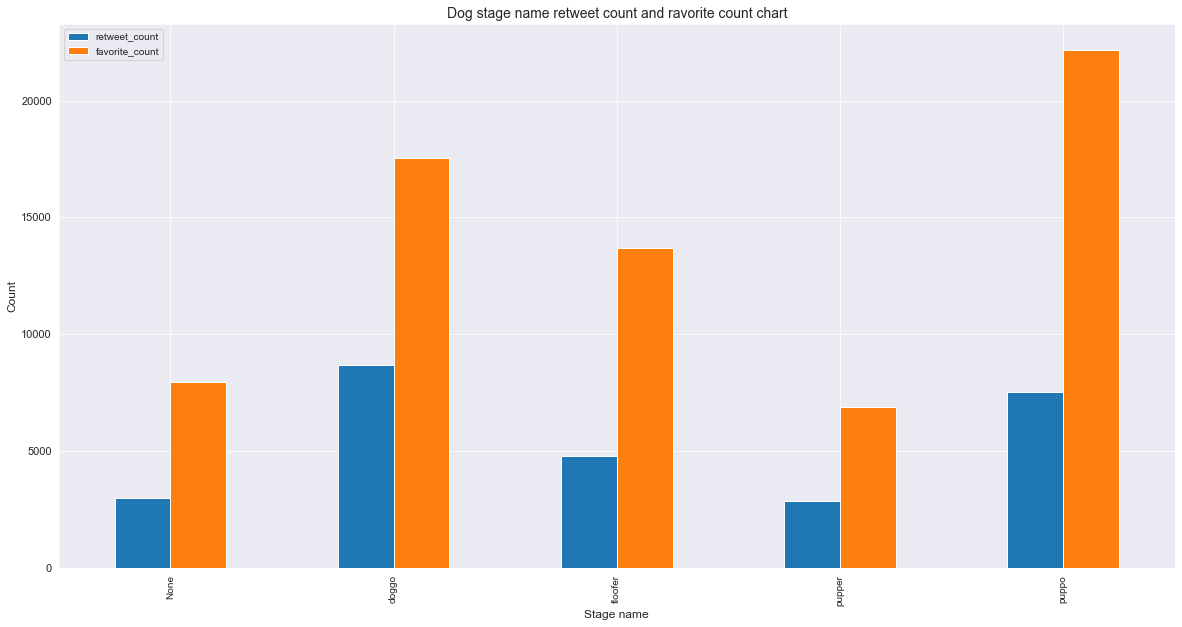

In [55]:
# calling the barplot function to visualize our retweet_count and favorite_count data
barplot(df_twitter_final_temp, 'Dog stage name retweet count and ravorite count chart' , 'Stage name', 'Count')

### Insight 2
2. Checking which dog stage is the most popular among all the stages

In [56]:
# Most Popular dog stage name
df_twitter_final['dog_stage_name'].value_counts()

None       1773
pupper      227
doggo        68
puppo        23
floofer       8
Name: dog_stage_name, dtype: int64

the most popular dog stage name is the pupper with 257 dogs while the least popular dog stage name is the floofer with 10 dogs and 1976 dogs where not categorized

### Insight 3
3. Which dog have the highest breed?

In [57]:
# Most popular dog breeds
df_twitter_final['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
crash_helmet            1
dhole                   1
platypus                1
ping-pong_ball          1
envelope                1
Name: p1, Length: 378, dtype: int64

golden_retriever has the highest number of breeds followed by Labrador_retriever and Pembroke while the least is padlock

### Insight 4
4. Which dog has the most popular name

In [58]:
# Most popular Dog name
df_twitter_final['name'].value_counts()

Charlie    12
Penny      10
Tucker     10
Lucy       10
Cooper      9
           ..
Geoff       1
Kloey       1
Sandra      1
Julio       1
Tonks       1
Name: name, Length: 922, dtype: int64

Charlie is the most popular dog name followed by Cooper and Lucy while the least is Pumpkin, Diogi etc. 